# CREDIT CARD FRAUD DETECTION USING MACHINE AND DEEP LEARNING ANALYSIS


# DAVID OGUNNIYI 

# B1102372

Installing necessary libraries

In [1]:
#pip install tensorflow
#!pip install imbalanced-learn

In [2]:
#importing the necessary libraries  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()
style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#importing the data into the notebook
df_credit = pd.read_csv('creditcard.csv')

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

<Axes: xlabel='Class', ylabel='count'>

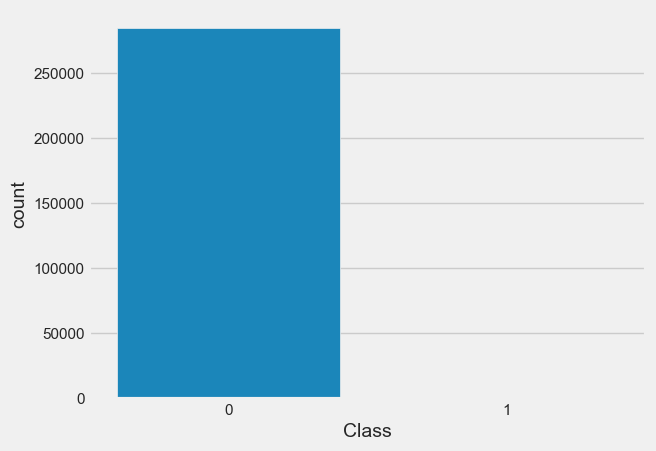

In [3]:
# Exploratory data analysis
print(df_credit.head())
print(df_credit.describe())

# Check for missing values
print(df_credit.isnull().sum())

# Check the class distribution
print(df_credit['Class'].value_counts(normalize=True))

# Visualize the class distribution
sns.countplot(x='Class', data=df_credit)

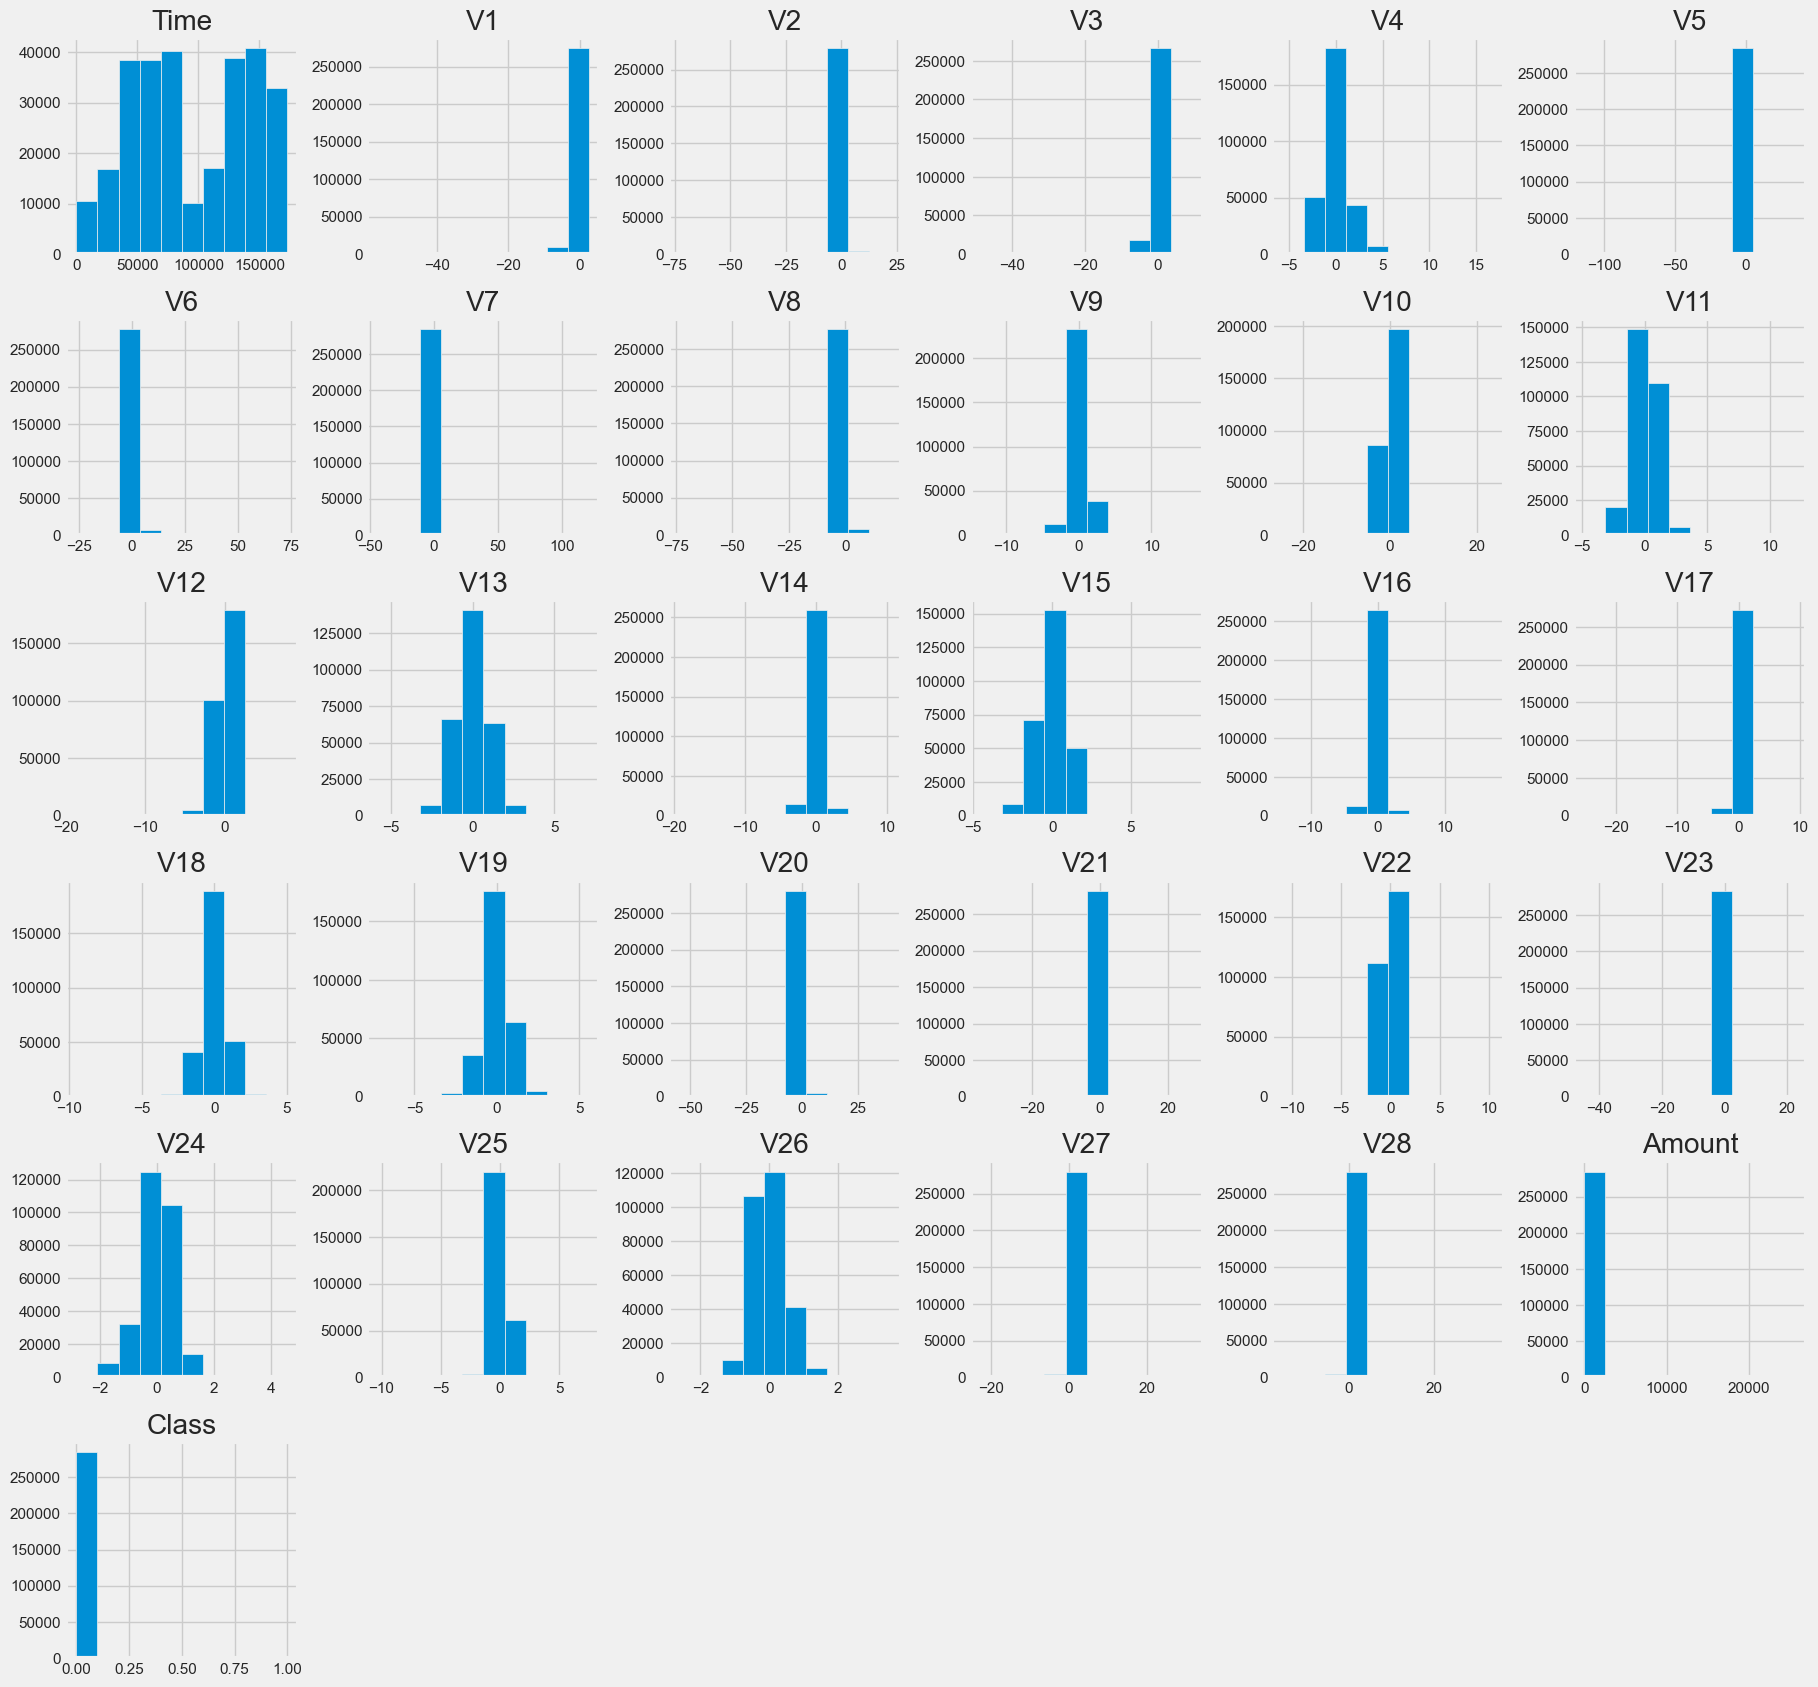

In [4]:
# Plotting histogram for each parameter
df_credit.hist(figsize = (20, 20))
plt.show()

In [5]:
# Normalize the amount column
df_credit['Amount'] = StandardScaler().fit_transform(df_credit['Amount'].values.reshape(-1, 1))

# Drop the Time column
df_credit = df_credit.drop('Time', axis=1)

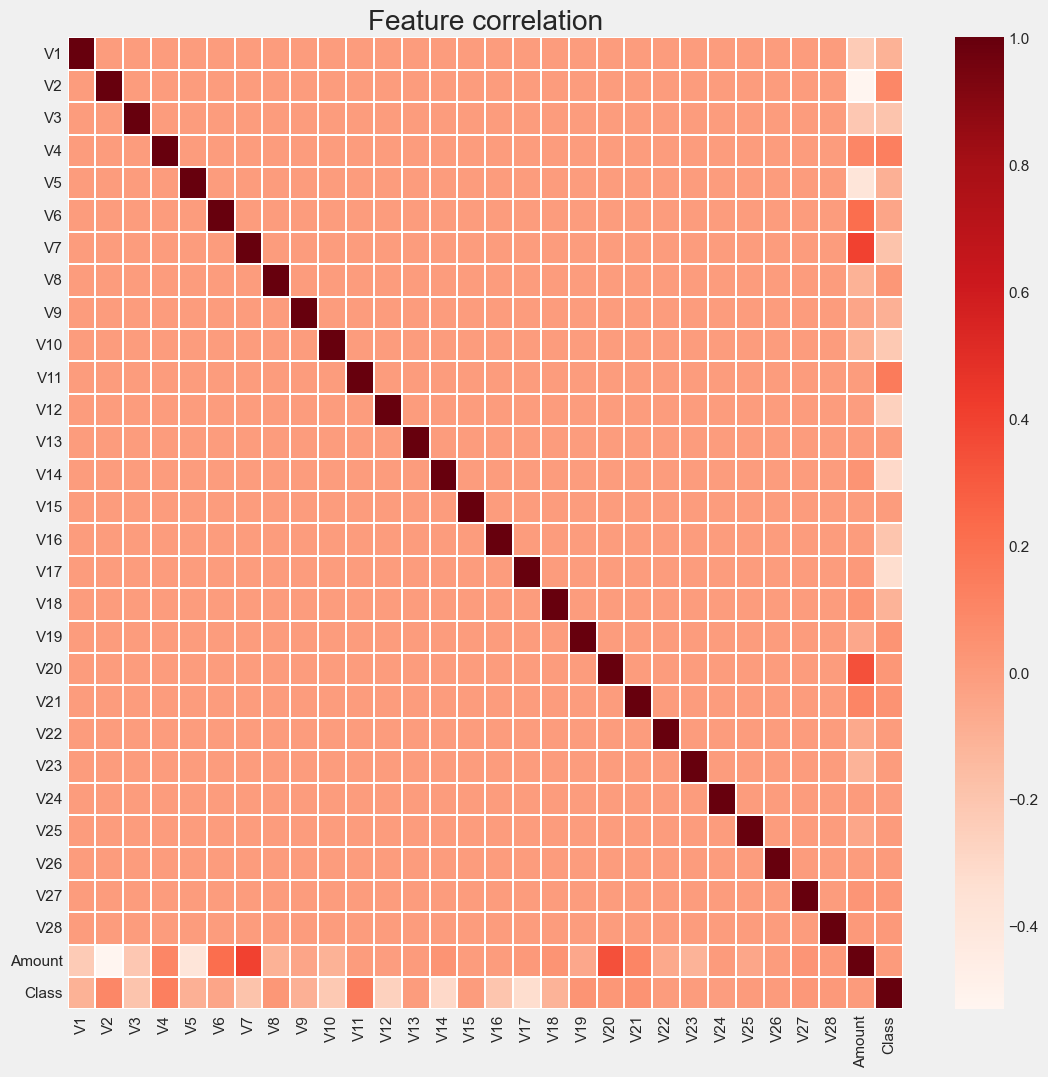

In [6]:
# Next on the agenda is Feature Correlation, to check for correlation between variables
plt.figure(figsize = (12,12))
plt.title('Feature correlation')
corr = df_credit.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [7]:
# Split the data into features and target
X = df_credit.drop('Class', axis=1)
y = df_credit['Class']

In [8]:
# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

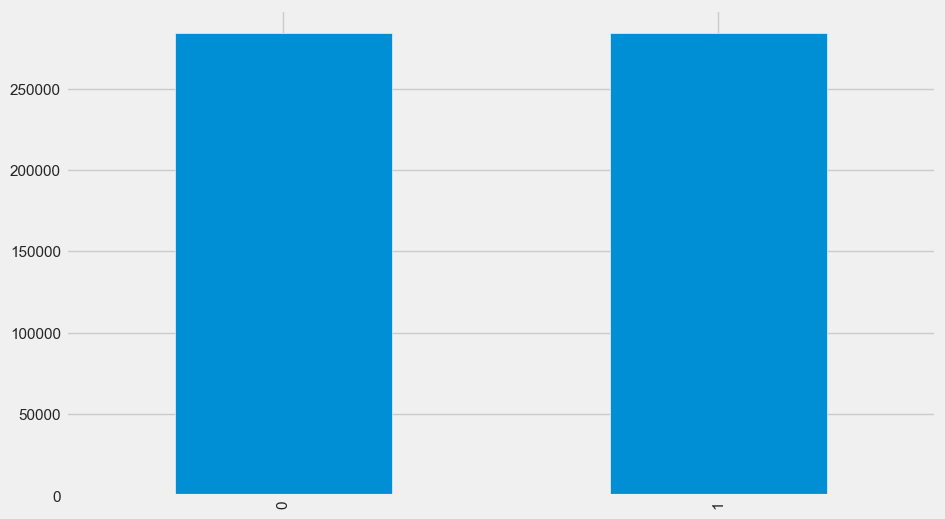

In [9]:
#plotting the new target distribution after SMOTE
plt.figure(figsize=(10,6))
ax=y_resampled.value_counts().plot(kind="bar")
plt.show()

In [10]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION

Training Accuracy: 94.58742943566115
The AUC Score:  94.747318602036
Testing Accuracy: 94.74174770940682
Precision score: 97.41520380839036
Recall score: 91.94397641112047
F1 score: 97.41520380839036


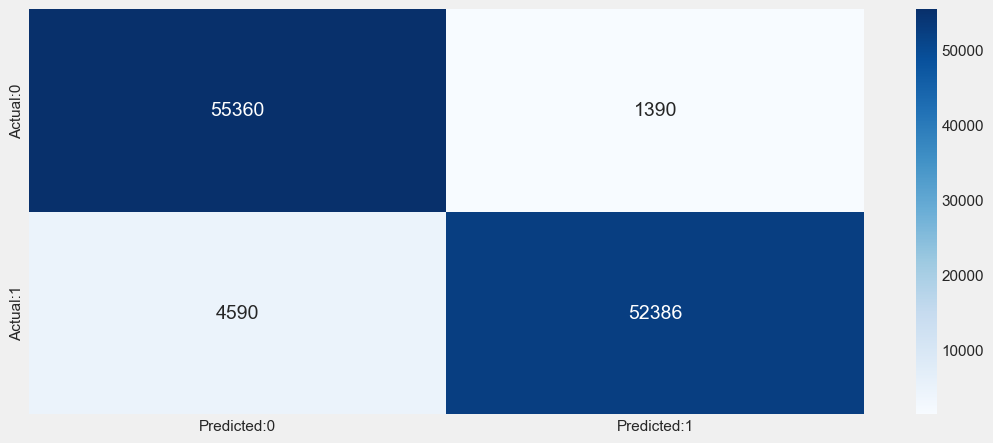

In [11]:
# First model is Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# The training accuracy 
log_tran = logreg.score(X_train, y_train)
print('Training Accuracy:', log_tran*100)

# Predicting / Testing

y_pred_logreg = logreg.predict(X_test)
y_pred_logreg

# The AUC (Area Under the Curve) of the Logistic Model

Auc_lr = roc_auc_score(y_test, y_pred_logreg)
print('The AUC Score: ', Auc_lr*100)

# The Accuracy score of the Logistic regression model

Log_acc = accuracy_score(y_test, y_pred_logreg)
print('Testing Accuracy:', Log_acc*100)

# The Precision score of the logistic regression model
Log_pre = precision_score(y_test, y_pred_logreg)
print('Precision score:', Log_pre*100)

# The Recall score of the logistic regression model
Log_rec = recall_score(y_test, y_pred_logreg)
print('Recall score:', Log_rec*100)

# The F1 score of the logistic regression model
Log_f1 = precision_score(y_test, y_pred_logreg)
print('F1 score:', Log_f1*100)

# Next, the confusion matrix for the LR model 

conf_mat = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(12,5))

con_matrix = pd.DataFrame(data=conf_mat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix, annot=True,fmt='d',cmap="Blues");

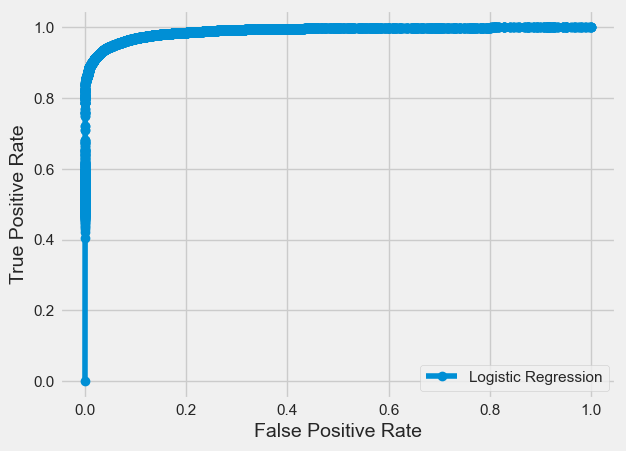

In [12]:
# Next is getting the False Positive rate and True Positive rate

predicted_prob_logistic = logreg.predict_proba(X_test)
predicted_prob_logistic = predicted_prob_logistic[:, 1]
Fpr, Tpr, _ = roc_curve(y_test, predicted_prob_logistic)


# Next plotting the ROC curve of the LR model


plt.plot(Fpr, Tpr, marker='o', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# DECISION TREE

Training Accuracy: 100.0
AUC score: 99.82837206669907
Testing Accuracy score: 99.8285352513937
Precision score: 99.747673868475
Recall score: 99.91048862679023
F1 score: 99.747673868475


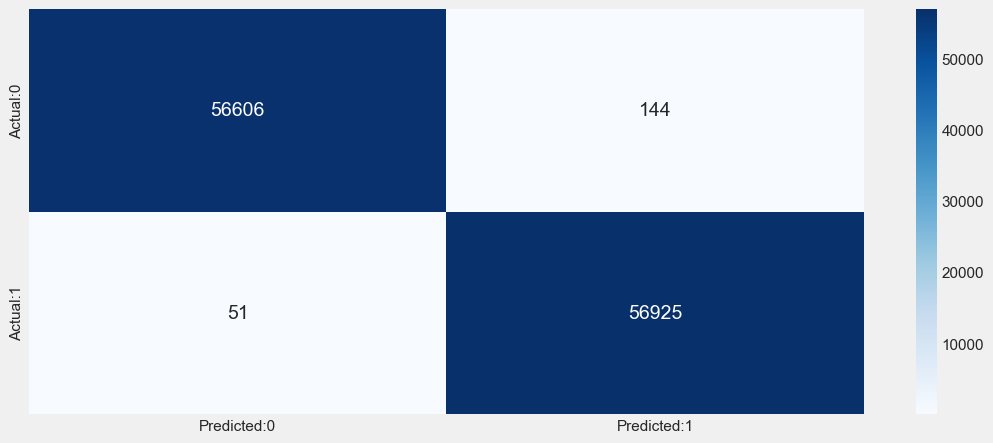

In [13]:
# The next model is Decision Tree Model 

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

# The training accuracy 

dec_tran = dec_tree.score(X_train, y_train)
print('Training Accuracy:', dec_tran*100)

# Predicting for Decision Model

y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_dec_tree

# The AUC (Area Under the Curve) of Decision tree Model

Auc_dec = roc_auc_score(y_test, y_pred_dec_tree)
print('AUC score:', Auc_dec*100)

# The Accuracy score of the Decision tree model

dec_acc = accuracy_score(y_test, y_pred_dec_tree)
print('Testing Accuracy score:', dec_acc*100)

# The Precision score 
dec_pre = precision_score(y_test, y_pred_dec_tree)
print('Precision score:', dec_pre*100)

# The Recall score 
dec_rec = recall_score(y_test, y_pred_dec_tree)
print('Recall score:', dec_rec*100)

# The F1 score 
dec_f1 = precision_score(y_test, y_pred_dec_tree)
print('F1 score:', dec_f1*100)

# Next, the confusion matrix for the Decision tree model 

conf_mat_dec = confusion_matrix(y_test, y_pred_dec_tree)

plt.figure(figsize=(12,5))

con_matrix2 = pd.DataFrame(data=conf_mat_dec,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix2, annot=True,fmt='d',cmap="Blues");

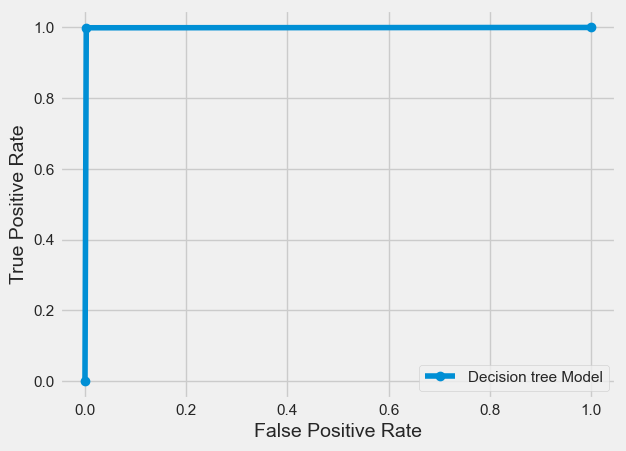

In [14]:
# Next is getting the False Positive rate and True Positive rate for Decision Tree model

predicted_prob_dec = dec_tree.predict_proba(X_test)
predicted_prob_dec = predicted_prob_dec[:, 1]
Fpr2, Tpr2, _ = roc_curve(y_test, predicted_prob_dec)

# Next plotting the ROC curve of the Decision tree model


plt.plot(Fpr2, Tpr2, marker='o', label='Decision tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# RANDOM FOREST

Training Accuracy: 100.0
AUC score: 99.98942731277533
Testing Accuracy score: 99.98944832316269
Precision score: 99.97894293535481
Recall score: 100.0
F1 score: 99.97894293535481


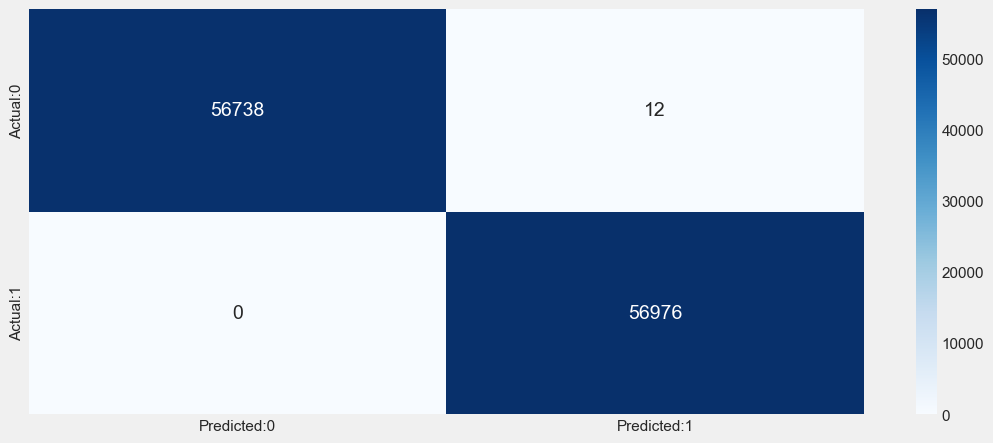

In [15]:
# The next model is Random Forest Model 

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

# The training accuracy 

rand_tran = rand_forest.score(X_train, y_train)
print('Training Accuracy:', rand_tran*100)

# Predicting for Random forest Model

y_pred_rand_forest = rand_forest.predict(X_test)
y_pred_rand_forest

# The AUC (Area Under the Curve) of Random Forest Model

Auc_rand = roc_auc_score(y_test, y_pred_rand_forest)
print('AUC score:', Auc_rand*100)

# The Accuracy score of the Random forest model

rand_acc = accuracy_score(y_test, y_pred_rand_forest)
print('Testing Accuracy score:', rand_acc*100)

# The Precision score 
rand_pre = precision_score(y_test, y_pred_rand_forest)
print('Precision score:', rand_pre*100)

# The Recall score 
rand_rec = recall_score(y_test, y_pred_rand_forest)
print('Recall score:', rand_rec*100)

# The F1 score 
rand_f1 = precision_score(y_test, y_pred_rand_forest)
print('F1 score:', rand_f1*100)

# Next, the confusion matrix for the Random forest model 

conf_mat_rand = confusion_matrix(y_test, y_pred_rand_forest)

plt.figure(figsize=(12,5))

con_matrix3 = pd.DataFrame(data=conf_mat_rand,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix3, annot=True,fmt='d',cmap="Blues");

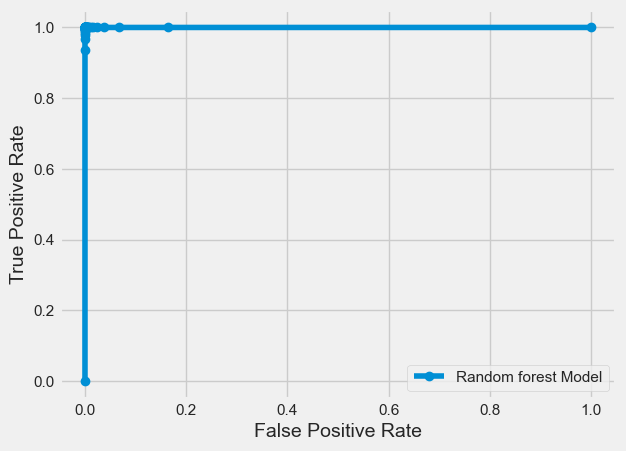

In [16]:
# Next is getting the False Positive rate and True Positive rate for Random forest model

predicted_prob_rand = rand_forest.predict_proba(X_test)
predicted_prob_rand = predicted_prob_rand[:, 1]
Fpr3, Tpr3, _ = roc_curve(y_test, predicted_prob_rand)

# Next plotting the ROC curve of the Random forest model


plt.plot(Fpr3, Tpr3, marker='o', label='Random forest Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# KNN

Training Accuracy: 99.93756924537924
AUC score: 99.8986784140969
Testing Accuracy score: 99.89887976364244
Precision score: 99.79856719973375
Recall score: 100.0
F1 score: 99.79856719973375


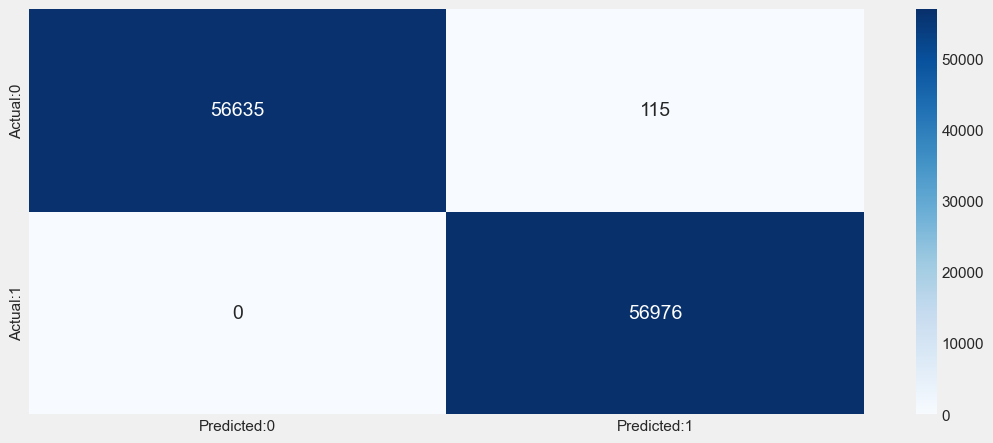

In [17]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
Knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(X_train, y_train)

# The training accuracy 

knn_tran = Knn_model.score(X_train, y_train)
print('Training Accuracy:', knn_tran*100)

# Predicting for KNN Model

y_pred_Knn_model = Knn_model.predict(X_test)
y_pred_Knn_model

# The AUC (Area Under the Curve) of KNN Model

Auc_knn = roc_auc_score(y_test, y_pred_Knn_model)
print('AUC score:', Auc_knn*100)

# The Accuracy score of the KNN model

Knn_acc = accuracy_score(y_test, y_pred_Knn_model)
print('Testing Accuracy score:', Knn_acc*100)

# The Precision score 
Knn_pre = precision_score(y_test, y_pred_Knn_model)
print('Precision score:', Knn_pre*100)

# The Recall score 
Knn_rec = recall_score(y_test, y_pred_Knn_model)
print('Recall score:', Knn_rec*100)

# The F1 score 
Knn_f1 = precision_score(y_test, y_pred_Knn_model)
print('F1 score:', Knn_f1*100)

# Next, the confusion matrix for the KNN model 

conf_mat_knn = confusion_matrix(y_test, y_pred_Knn_model)

plt.figure(figsize=(12,5))

con_matrix4 = pd.DataFrame(data=conf_mat_knn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix4, annot=True,fmt='d',cmap="Blues");

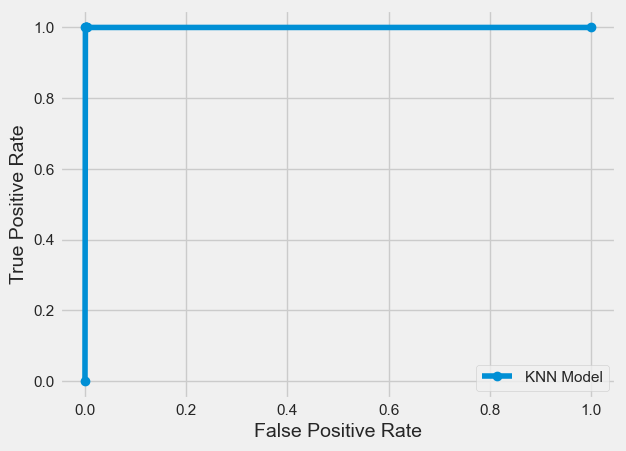

In [18]:
# Next is getting the False Positive rate and True Positive rate for KNN model

predicted_prob_knn = Knn_model.predict_proba(X_test)
predicted_prob_knn = predicted_prob_knn[:, 1]
Fpr4, Tpr4, _ = roc_curve(y_test, predicted_prob_knn)

# Next plotting the ROC curve of the KNN model


plt.plot(Fpr4, Tpr4, marker='o', label='KNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# MLP

In [19]:
from sklearn.neural_network import MLPClassifier

Iteration 1, loss = 0.01482188
Iteration 2, loss = 0.00460695
Iteration 3, loss = 0.00312070
Iteration 4, loss = 0.00278987
Iteration 5, loss = 0.00246526
Iteration 6, loss = 0.00225133
Iteration 7, loss = 0.00186890
Iteration 8, loss = 0.00158514
Iteration 9, loss = 0.00168742
Iteration 10, loss = 0.00142671
Iteration 11, loss = 0.00133109
Iteration 12, loss = 0.00134403
Iteration 13, loss = 0.00149725
Iteration 14, loss = 0.00097942
Iteration 15, loss = 0.00115833
Iteration 16, loss = 0.00106837
Iteration 17, loss = 0.00091931
Iteration 18, loss = 0.00109739
Iteration 19, loss = 0.00097772
Iteration 20, loss = 0.00073082
Iteration 21, loss = 0.00086718
Iteration 22, loss = 0.00080055
Iteration 23, loss = 0.00084079
Iteration 24, loss = 0.00097717
Iteration 25, loss = 0.00066026
Iteration 26, loss = 0.00068124
Iteration 27, loss = 0.00090082
Iteration 28, loss = 0.00078857
Iteration 29, loss = 0.00063307
Iteration 30, loss = 0.00065885
Iteration 31, loss = 0.00082027
Training loss did

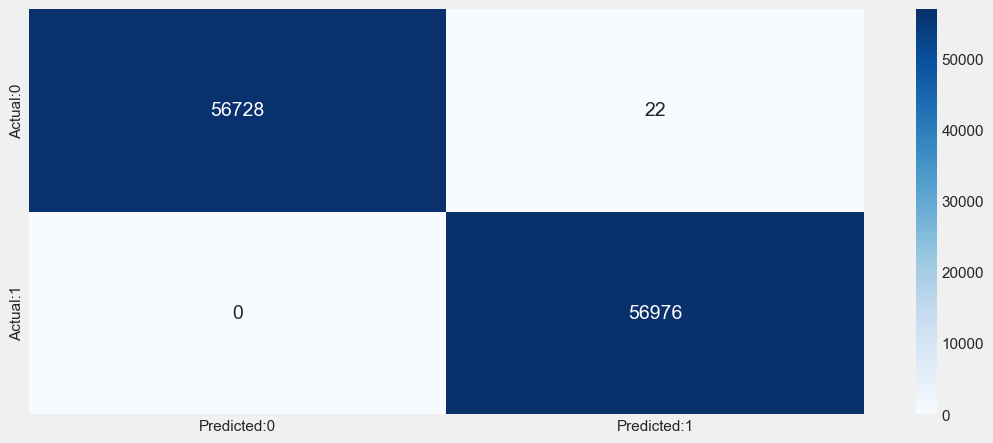

In [20]:
Mlp_nn = MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)

#predicting
Mlp_nn.fit(X_train, y_train)
Mlp_nn_pred= Mlp_nn.predict(X_test)

# Training Accuracy
Mlp_tran = Mlp_nn.score(X_train, y_train)
print('Training Accuracy:', Mlp_tran*100)

# The Accuracy score of the MLP NN model

Mlp_acc = accuracy_score(y_test, Mlp_nn_pred)
print('Testing Accuracy score:', Mlp_acc*100)

# The AUC (Area Under the Curve) of the Model

Mlp_auc = roc_auc_score(y_test, Mlp_nn_pred)
print('AUC score:', Mlp_auc*100)

# The Precision score 
Mlp_pre = precision_score(y_test, Mlp_nn_pred)
print('Precision score:', Mlp_pre*100)

# The Recall score 
Mlp_rec = recall_score(y_test, Mlp_nn_pred)
print('Recall score:', Mlp_rec*100)

# The F1 score 
Mlp_f1 = precision_score(y_test, Mlp_nn_pred)
print('F1 score:', Mlp_f1*100)

# Next, the confusion matrix for the MLP NN model 

conf_mat_Mlp = confusion_matrix(y_test, Mlp_nn_pred)

plt.figure(figsize=(12,5))

con_matrix5 = pd.DataFrame(data=conf_mat_Mlp,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix5, annot=True,fmt='d',cmap="Blues");

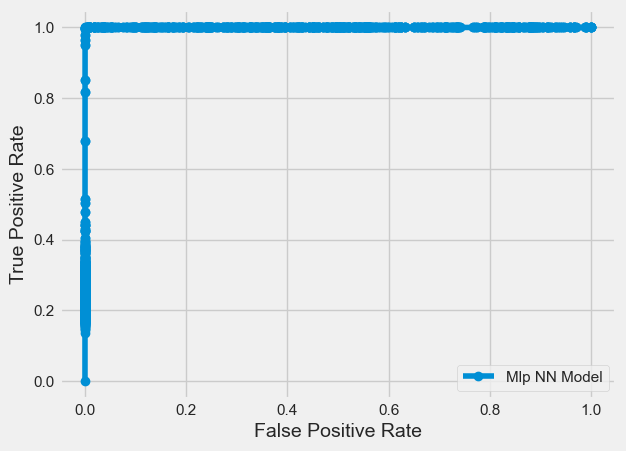

In [21]:
# Next is getting the False Positive rate and True Positive rate for MLP NN model

predicted_prob_Mlp = Mlp_nn.predict_proba(X_test)
predicted_prob_Mlp = predicted_prob_Mlp[:, 1]
Fpr5, Tpr5, _ = roc_curve(y_test, predicted_prob_Mlp)

# Next plotting the ROC curve of the KNN model


plt.plot(Fpr5, Tpr5, marker='o', label='Mlp NN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ANN

Epoch 1/10
14216/14216 [==============================] - 26s 2ms/step - loss: 0.0967 - accuracy: 0.9615 - val_loss: 0.0246 - val_accuracy: 0.9938
Epoch 2/10
14216/14216 [==============================] - 25s 2ms/step - loss: 0.0447 - accuracy: 0.9830 - val_loss: 0.0194 - val_accuracy: 0.9951
Epoch 3/10
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0401 - accuracy: 0.9852 - val_loss: 0.0165 - val_accuracy: 0.9969
Epoch 4/10
14216/14216 [==============================] - 28s 2ms/step - loss: 0.0388 - accuracy: 0.9858 - val_loss: 0.0159 - val_accuracy: 0.9972
Epoch 5/10
14216/14216 [==============================] - 26s 2ms/step - loss: 0.0374 - accuracy: 0.9862 - val_loss: 0.0149 - val_accuracy: 0.9972
Epoch 6/10
14216/14216 [==============================] - 28s 2ms/step - loss: 0.0366 - accuracy: 0.9867 - val_loss: 0.0142 - val_accuracy: 0.9971
Epoch 7/10
14216/14216 [==============================] - 28s 2ms/step - loss: 0.0354 - accuracy: 0.9874 - val_loss: 0

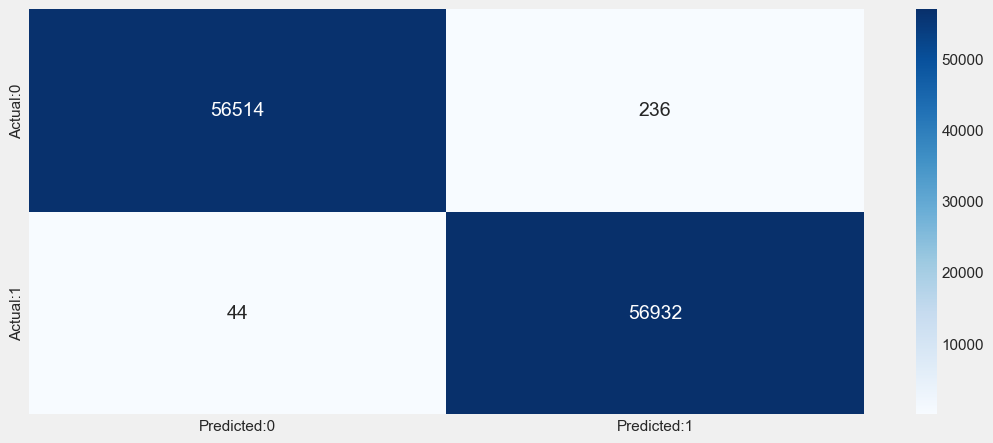

In [22]:
# Define the ANN model
model_ann = keras.Sequential([
    layers.Dense(32, activation='relu', input_dim=29),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile and train the ANN model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set and evaluate the ANN model
y_pred_ann = model_ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

# Accuracy score of the Artificial neural network model

Ann_acc = accuracy_score(y_test, y_pred_ann)
print('Testing Accuracy score:', Ann_acc*100)

# The AUC (Area Under the Curve) of the ANN Model

Ann_auc = roc_auc_score(y_test, y_pred_ann)
print('AUC score:', Ann_auc*100)

# The Precision score of the ANN Model
Ann_pre = precision_score(y_test, y_pred_ann)
print('Precision score:', Ann_pre*100)

# The Recall score of the ANN Model
Ann_rec = recall_score(y_test, y_pred_ann)
print('Recall score:', Ann_rec*100)

# The F1 score of the ANN model
Ann_f1 = precision_score(y_test, y_pred_ann)
print('F1 score:', Ann_f1*100)

# Next, the confusion matrix for the ANN model 

conf_mat_Ann = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(12,5))

con_matrix6 = pd.DataFrame(data=conf_mat_Ann,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix6, annot=True,fmt='d',cmap="Blues");

y_pred_ann = np.round(y_pred_ann).astype(int)

# MODELS COMPARISION

In [25]:
# making a table for the models evaluation metrics
model_results = pd.DataFrame([["Logistic Regression",Log_acc*100,Auc_lr*100,Log_pre*100,Log_rec*100,Log_f1*100],
                              ["Decision Tree",dec_acc*100,Auc_dec*100,dec_pre*100,dec_rec*100,dec_f1*100],
                              [" Artificial neural network",Ann_acc*100,Ann_auc*100,Ann_pre*100,Ann_rec*100,Ann_f1*100],
                              ["Multilayer Perceptron NN",Mlp_acc*100,Mlp_auc*100,Mlp_pre*100,Mlp_rec*100,Mlp_f1*100],
                              ["Random Forest",rand_acc*100,Auc_rand*100,rand_pre*100,rand_rec*100,rand_f1*100],
                              ["K-Nearest Neighbor",Knn_acc*100,Auc_knn*100,Knn_pre*100,Knn_rec*100,Knn_f1*100]],
                             columns = ["Models","Accuracy Score","Auc Score","Precision Score","Recall Score", 
                                       "F1 Score"]).sort_values(by='Accuracy Score',ascending=False)


model_results.style.background_gradient(cmap='Blues')

,Models,Accuracy Score,Auc Score,Precision Score,Recall Score,F1 Score
4,Random Forest,99.989448,99.989427,99.978943,100.000000,99.978943
3,Multilayer Perceptron NN,99.980655,99.980617,99.961402,100.000000,99.961402
5,K-Nearest Neighbor,99.898880,99.898678,99.798567,100.000000,99.798567
1,Decision Tree,99.828535,99.828372,99.747674,99.910489,99.747674
2,Artificial neural network,99.753794,99.753458,99.587182,99.922775,99.587182
0,Logistic Regression,94.741748,94.747319,97.415204,91.943976,97.415204


# BARPLOT COMPARING MODEL ACCURACY

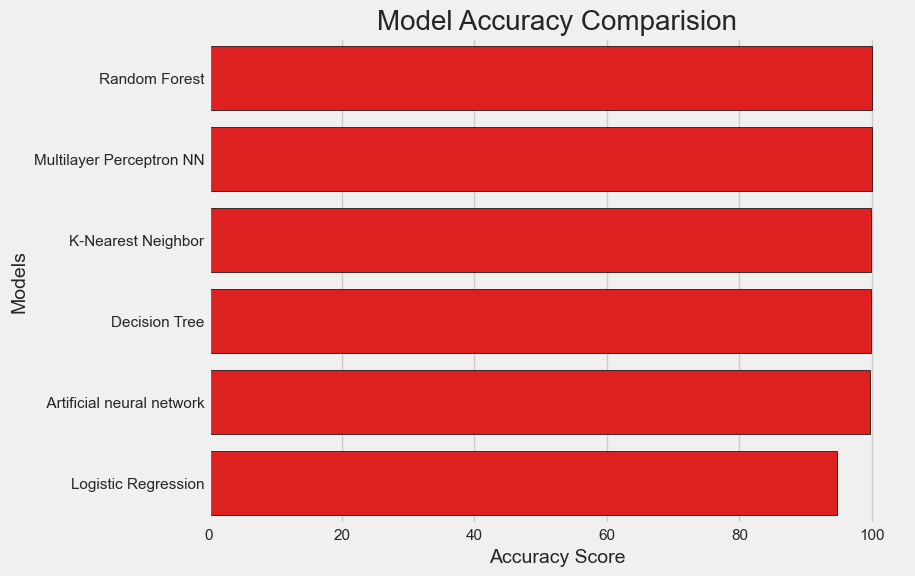

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_color_codes('pastel')
sns.barplot(y = 'Models', x = 'Accuracy Score', data = model_results, color='red', edgecolor='black')
plt.title('Model Accuracy Comparision', fontsize=20)
plt.show()